In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [ ]:
def process_and_merge_datasets(arcgis_csv_path, list_excel_path):
    df_arcgis = pd.read_csv(arcgis_csv_path)
    df_list = pd.read_excel(list_excel_path)
    df_list.columns = ['route', 'address', 'city', 'zipcode', 'qty']
    df_list_cleaned = df_list.dropna(subset=['route', 'address', 'city', 'zipcode', 'qty'])
    df_qty_by_zipcode = df_list_cleaned.groupby('zipcode')['qty'].sum().reset_index()
    df_qty_by_zipcode.rename(columns={'zipcode': 'ZIP Code', 'qty': 'Total Quantity'}, inplace=True)
    merged_df = pd.merge(df_arcgis, df_qty_by_zipcode, on='ZIP Code', how='left')
    merged_df['Total Quantity']=merged_df['Total Quantity'].fillna(0)
    return merged_df

arcgis_csv_path = 'C:\\Users\\User\\Downloads\\CannaBusinesses_Arcgis.csv'
list_excel_path = 'C:\\Users\\User\\Downloads\\Cannabuff_List.xlsx'
merged_df = process_and_merge_datasets(arcgis_csv_path, list_excel_path)

merged_df.head()


,ZIP Code,2023 Pop Age 25+: Bachelor's Degree,2023 Annual Budget Expenditures,2023 Smoked Cigarettes/12 Mo,2023 Used Electronic Cigarette/Vaping Device/12 Mo,2023 Visited Doctor/12 Mo,2023 Read Magazine (Paper/Electronic Vers)/6 Mo,2023 Read Health Magazine (Hard Copy)/6 Mo,2023 Bought Gift/Prepaid Card: Coffee Shop/6 Mo_number,2023 Bought Gift/Prepaid Card: Coffee Shop/6 Mo_perc,2023 Social Media: Find Local Info Very Imprtnt_number,2023 Social Media: Find Local Info Very Imprtnt_perc,2023 Social Media: Posted Picture/30 Days_number,2023 Social Media: Posted Picture/30 Days_perc,Total Quantity
0,14026,114,32405167,61,23,667,697,58,65,0.0824,85,0.1077,337,0.4271,0.0
1,14072,3858,894856256,1336,600,14689,15412,1027,1349,0.0766,1815,0.1030,7195,0.4084,0.0
2,14120,6451,1652227319,3500,1352,29823,31039,2213,2648,0.0732,4016,0.1110,14813,0.4094,50.0
3,14150,6767,1347942037,3366,1338,27956,29084,2032,2264,0.0662,3758,0.1099,13774,0.4028,150.0
4,14201,2235,371057844,1275,435,8345,9450,837,516,0.0473,1266,0.1161,4220,0.3871,50.0


In [ ]:
merged_df.sort_values(by=["Total Quantity"]).tail()

,ZIP Code,2023 Pop Age 25+: Bachelor's Degree,2023 Annual Budget Expenditures,2023 Smoked Cigarettes/12 Mo,2023 Used Electronic Cigarette/Vaping Device/12 Mo,2023 Visited Doctor/12 Mo,2023 Read Magazine (Paper/Electronic Vers)/6 Mo,2023 Read Health Magazine (Hard Copy)/6 Mo,2023 Bought Gift/Prepaid Card: Coffee Shop/6 Mo_number,2023 Bought Gift/Prepaid Card: Coffee Shop/6 Mo_perc,2023 Social Media: Find Local Info Very Imprtnt_number,2023 Social Media: Find Local Info Very Imprtnt_perc,2023 Social Media: Posted Picture/30 Days_number,2023 Social Media: Posted Picture/30 Days_perc,Total Quantity
15,14214,2918,593264720,1664,727,12972,14615,1071,955,0.0579,1962,0.1189,6609,0.4005,130.0
26,14226,6486,1190078442,1889,782,19652,21353,1361,1767,0.0736,2522,0.1050,9496,0.3954,130.0
3,14150,6767,1347942037,3366,1338,27956,29084,2032,2264,0.0662,3758,0.1099,13774,0.4028,150.0
14,14213,3203,625658860,2887,1153,15244,17344,1721,858,0.0420,2494,0.1220,7991,0.3909,260.0
25,14225,5369,1043414556,3246,1290,23354,24018,1629,1754,0.0608,3286,0.1139,11672,0.4044,450.0


In [ ]:
df_known_quantity = merged_df.dropna(subset=['2023 Read Health Magazine (Hard Copy)/6 Mo'])
X = df_known_quantity.drop(['ZIP Code', 'Total Quantity',"2023 Smoked Cigarettes/12 Mo","2023 Used Electronic Cigarette/Vaping Device/12 Mo",'2023 Read Health Magazine (Hard Copy)/6 Mo'], axis=1)
# Remove number instead of _perc
y = df_known_quantity['2023 Read Health Magazine (Hard Copy)/6 Mo']


In [ ]:
def perform_linear_regression(X, y):
    model = sm.OLS(y, sm.add_constant(X)).fit()
    return model
model=perform_linear_regression(X,y)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        OLS Regression Results                                        
======================================================================================================
Dep. Variable:     2023 Read Health Magazine (Hard Copy)/6 Mo   R-squared:                       0.991
Model:                                                    OLS   Adj. R-squared:                  0.986
Method:                                         Least Squares   F-statistic:                     202.2
Date:                                        Fri, 19 Apr 2024   Prob (F-statistic):           2.25e-16
Time:                                                17:01:38   Log-Likelihood:                -163.81
No. Observations:                                          29   AIC:                             349.6
Df Residuals:                                              18   BIC:                             364.7
Df Model:                                                  10                                         
Covariance Type:                                    nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                   1629.3395   1151.101      1.415      0.174    -789.033    4047.712
2023 Pop Age 25+: Bachelor's Degree                       -0.2133      0.042     -5.080      0.000      -0.301      -0.125
2023 Annual Budget Expenditures                         9.245e-07   3.22e-07      2.869      0.010    2.47e-07     1.6e-06
2023 Visited Doctor/12 Mo                                  0.0382      0.077      0.495      0.626      -0.124       0.200
2023 Read Magazine (Paper/Electronic Vers)/6 Mo            0.2016      0.047      4.324      0.000       0.104       0.300
2023 Bought Gift/Prepaid Card: Coffee Shop/6 Mo_number    -1.4192      0.478     -2.972      0.008      -2.423      -0.416
2023 Bought Gift/Prepaid Card: Coffee Shop/6 Mo_perc    7158.9296   7199.838      0.994      0.333   -7967.368    2.23e+04
2023 Social Media: Find Local Info Very Imprtnt_number     0.0135      0.462      0.029      0.977      -0.956       0.983
2023 Social Media: Find Local Info Very Imprtnt_perc   -2368.6192   7727.300     -0.307      0.763   -1.86e+04    1.39e+04
2023 Social Media: Posted Picture/30 Days_number          -0.1108      0.130     -0.852      0.406      -0.384       0.163
2023 Social Media: Posted Picture/30 Days_perc         -4645.8404   2760.704     -1.683      0.110   -1.04e+04    1154.183
==============================================================================
Omnibus:                        2.268   Durbin-Watson:                   2.152
Prob(Omnibus):                  0.322   Jarque-Bera (JB):                1.693
Skew:                          -0.589   Prob(JB):                        0.429
Kurtosis:                       2.889   Cond. No.                     5.66e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.66e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# features=X.fillna(X.mean())
# scaler = StandardScaler()
# features_scaled = scaler.fit_transform(features)
# wcss = []
# for i in range(1, 11):
#     kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
#     kmeans.fit(features_scaled)
#     wcss.append(kmeans.inertia_)
#     plt.plot(range(1, 11), wcss)
# plt.title('Elbow Method')
# plt.xlabel('Number of clusters')
# plt.ylabel('WCSS')  # within cluster sum of squares
# plt.show()

In [ ]:
features=X.fillna(X.mean())
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
k = 3
# Running K-means clustering
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(features_scaled)
merged_df['Cluster'] = cluster_labels

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


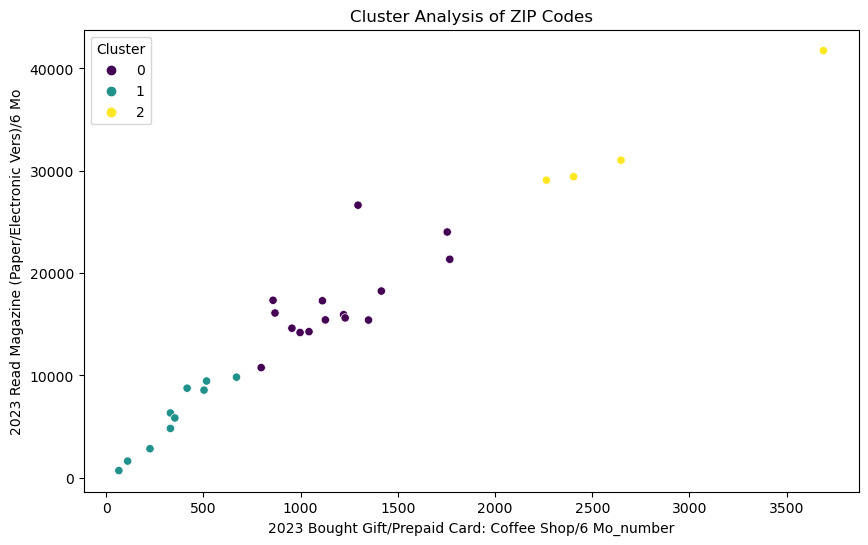

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='2023 Bought Gift/Prepaid Card: Coffee Shop/6 Mo_number', y='2023 Read Magazine (Paper/Electronic Vers)/6 Mo', hue='Cluster', palette='viridis')
plt.title('Cluster Analysis of ZIP Codes')
plt.xlabel('2023 Bought Gift/Prepaid Card: Coffee Shop/6 Mo_number')
plt.ylabel('2023 Read Magazine (Paper/Electronic Vers)/6 Mo')
plt.legend(title='Cluster')
plt.show()

In [ ]:
merged_df.sort_values(by='Cluster').head()

,ZIP Code,2023 Pop Age 25+: Bachelor's Degree,2023 Annual Budget Expenditures,2023 Smoked Cigarettes/12 Mo,2023 Used Electronic Cigarette/Vaping Device/12 Mo,2023 Visited Doctor/12 Mo,2023 Read Magazine (Paper/Electronic Vers)/6 Mo,2023 Read Health Magazine (Hard Copy)/6 Mo,2023 Bought Gift/Prepaid Card: Coffee Shop/6 Mo_number,2023 Bought Gift/Prepaid Card: Coffee Shop/6 Mo_perc,2023 Social Media: Find Local Info Very Imprtnt_number,2023 Social Media: Find Local Info Very Imprtnt_perc,2023 Social Media: Posted Picture/30 Days_number,2023 Social Media: Posted Picture/30 Days_perc,Total Quantity,Cluster
28,14261,130,187326,560,620,4067,4818,198,330,0.0602,593,0.1081,2169,0.3955,0.0,1
21,14221,12734,2652944424,3092,1217,39065,41751,2739,3689,0.0799,4642,0.1005,17450,0.3779,130.0,2
24,14224,6741,1489982706,3180,1183,28357,29426,2098,2404,0.0702,3687,0.1077,13762,0.4020,70.0,2
3,14150,6767,1347942037,3366,1338,27956,29084,2032,2264,0.0662,3758,0.1099,13774,0.4028,150.0,2
2,14120,6451,1652227319,3500,1352,29823,31039,2213,2648,0.0732,4016,0.1110,14813,0.4094,50.0,2


In [ ]:
# # Create an interactive map using Folium at a central location based on the dataset
# central_lat = merged_data['lat'].mean()
# central_lon = merged_data['lng'].mean()
# map = folium.Map(location=[central_lat, central_lon], zoom_start=10, tiles='OpenStreetMap')

# # Add markers for each ZIP Code in the merged dataset
# for idx, row in merged_data.iterrows():
#     folium.Marker([row['lat'], row['lng']], tooltip=f"ZIP: {row['ZIP Code']}").add_to(map)

# # Show the map
# map


In [ ]:
import pandas as pd
import folium

geo = pd.read_excel(r'C:\Users\User\Downloads\simplemaps_uszips_basicv1.84\uszips.xlsx')

merged_data = pd.merge(merged_df, geo[['zip', 'lat', 'lng']], left_on='ZIP Code', right_on='zip', how='left')

central_lon = merged_data['lng'].mean()
map_quantity = folium.Map(location=[central_lat, central_lon], zoom_start=10, tiles='OpenStreetMap')
# Define colors for different clusters
cluster_colors = ['red', 'blue', 'green', 'purple', 'orange', 'black']
for idx, row in merged_data.iterrows():
    cluster_label = int(row['Cluster'])
    total_quantity = row['Total Quantity']
    # Ensure color cycles through the list if there are more clusters than colors
    color = cluster_colors[cluster_label % len(cluster_colors)]


    folium.CircleMarker(
        location=[row['lat'], row['lng']],
        radius=5 + total_quantity * 0.05,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        tooltip=f"ZIP: {row['ZIP Code']}, Cluster: {cluster_label}, Total Quantity: {total_quantity}"
    ).add_to(map_quantity)
# Display the map
map_quantity